In [1]:
import networkx as nx
import pandas as pd


In [2]:
#leemos el dataframe 
df = pd.read_csv('data_bertopic.csv')
pivot_table = df.pivot_table(index = ["url","date"], columns =["channel"], values = "id", aggfunc = "count")
pivot_table.to_csv('prueba.csv')



In [3]:
fila_anterior = None 
contador = 0
conexion = {}
edges = {}
valor_anterior = 0

#Creamos el Graph
G = nx.Graph()
for row_label, row in pivot_table.iterrows():
    #if(contador == 100): break
    contador +=1
    # Obtenemos una lista de todas las claves del diccionario
    claves = list(conexion.keys())
    # Recorremos la lista de claves con un bucle for anidado
    for i in range(len(claves)):
        for j in range(i+1, len(claves)):
            valor_enlace = conexion[claves[i]] + conexion[claves[j]]
            print(claves[i])
            print(claves[j])
            print(valor_enlace)
            edges[(claves[i],claves[j])] = valor_enlace
            G.add_edges_from([(claves[i],claves[j], {'weight': valor_enlace})])       
    conexion = {}
            
    for col_label in pivot_table.columns:
        G.add_node(col_label)
        valor = pivot_table.loc[row_label, col_label]
        if fila_anterior == row_label:
            if(valor > 3):
                
               
                conexion[col_label] = valor
                # esto es para luego fila = df.loc[(df['url'] == row_label) & (df['channel'] == col_label)]
              
        else:
            fila_anterior = row_label
            
nx.write_edgelist(G, path="grid.edgelist", delimiter=":")
           
            
     
     
    
  

Dr_Angel_Ruiz_Valdepe_as
PADRESPORLAVERDAD
12.0
Dr_Angel_Ruiz_Valdepe_as
PLANDEMIA_MUNDIAL_COVID
12.0
Dr_Angel_Ruiz_Valdepe_as
RosselloCM
12.0
Dr_Angel_Ruiz_Valdepe_as
elinvestigador_org
12.0
Dr_Angel_Ruiz_Valdepe_as
rafapalreal
12.0
PADRESPORLAVERDAD
PLANDEMIA_MUNDIAL_COVID
12.0
PADRESPORLAVERDAD
RosselloCM
12.0
PADRESPORLAVERDAD
elinvestigador_org
12.0
PADRESPORLAVERDAD
rafapalreal
12.0
PLANDEMIA_MUNDIAL_COVID
RosselloCM
12.0
PLANDEMIA_MUNDIAL_COVID
elinvestigador_org
12.0
PLANDEMIA_MUNDIAL_COVID
rafapalreal
12.0
RosselloCM
elinvestigador_org
12.0
RosselloCM
rafapalreal
12.0
elinvestigador_org
rafapalreal
12.0
ElDiestro
estamosdespiertos
21.0
PLANDEMIA_MUNDIAL_COVID
rafapalreal
23.0
Dr_Angel_Ruiz_Valdepe_as
Medicosporlaverdad
10.0
Dr_Angel_Ruiz_Valdepe_as
PLANDEMIA_MUNDIAL_COVID
10.0
Dr_Angel_Ruiz_Valdepe_as
elinvestigador_org
10.0
Dr_Angel_Ruiz_Valdepe_as
laquintacolumna
10.0
Medicosporlaverdad
PLANDEMIA_MUNDIAL_COVID
10.0
Medicosporlaverdad
elinvestigador_org
10.0
Medicosporlaverda

In [4]:
# print the adjacency list
for line in nx.generate_adjlist(G):
    print(line)
# write edgelist to grid.edgelist
nx.write_edgelist(G, path="grid.edgelist", delimiter=":")

BLesNoticias
DrDeBenito
Dr_Angel_Ruiz_Valdepe_as PADRESPORLAVERDAD PLANDEMIA_MUNDIAL_COVID RosselloCM elinvestigador_org rafapalreal Medicosporlaverdad laquintacolumna comusav apellidoobligatorio trikooba despertadordelamatrix
ElContrafuerte
ElDiestro estamosdespiertos
InfoVacunas
Medicosporlaverdad PLANDEMIA_MUNDIAL_COVID elinvestigador_org laquintacolumna rafapalreal
PADRESPORLAVERDAD PLANDEMIA_MUNDIAL_COVID RosselloCM elinvestigador_org rafapalreal
PLANDEMIA_MUNDIAL_COVID RosselloCM elinvestigador_org rafapalreal laquintacolumna
RosselloCM elinvestigador_org rafapalreal lasaludentusmanos canal5informa
apellidoobligatorio
canal5informa
cloritodesodio
comusav elinvestigador_org
despertadordelamatrix
ejercitoremanente
elarconte
elexpresodemedianoche rafapalreal
elinvestigador_org rafapalreal laquintacolumna lasaludentusmanos unionDisidente
elmurodelaverdad
estamosdespiertos unionDisidente
laquintacolumna rafapalreal
lasaludentusmanos
maskebellas
noticiasNOM
periodistasporlaverdad
polic

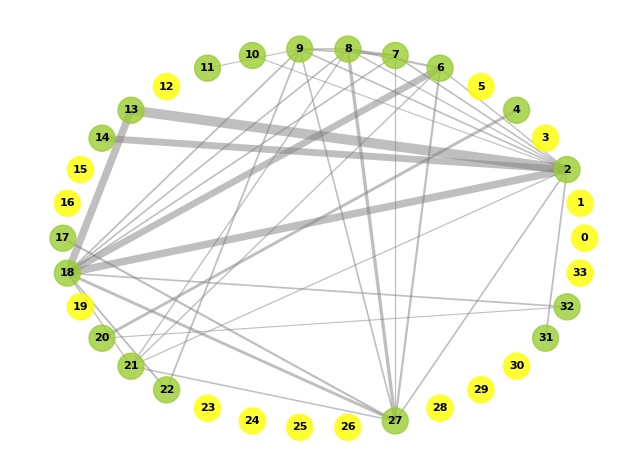

In [11]:
import random
import csv
import json
import matplotlib.pyplot as plt
import networkx as nx

# Obtener el layout inicial utilizando el algoritmo de Fruchterman-Reingold
pos = nx.circular_layout(G, scale=10)

# Crear un diccionario que asocie nombres de nodos con números enteros
node_dict = {node: i for i, node in enumerate(G.nodes)}

# Obtener los nodos que no tienen conexiones
isolated_nodes = [node for node in G.nodes if len(list(G.neighbors(node))) == 0]

# Dibujar nodos con conexiones en verde y nodos aislados en amarillo
node_color = ["#9acd32" if node not in isolated_nodes else "yellow" for node in G.nodes]
nx.draw_networkx_nodes(G, pos=pos, node_size=350, node_color=node_color, alpha=0.8)

# Obtener los pesos de las aristas
edge_weights = nx.get_edge_attributes(G, "weight")

# Dibujar las aristas con el ancho de línea ajustado al peso
nx.draw_networkx_edges(G, pos=pos, width=[w * 0.1 for w in edge_weights.values()], alpha=0.5, edge_color="gray")

# Agregar etiquetas de nodos
nx.draw_networkx_labels(G, pos=pos, labels=node_dict, font_size=8, font_weight="bold")


# Ajustar límites y guardar figura
plt.axis("off")
plt.tight_layout()
plt.savefig("grafo_optimizado.png", dpi=300)
plt.show()

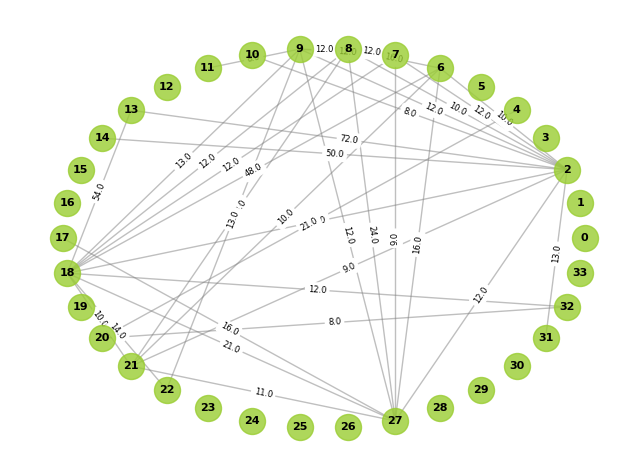

In [6]:

import random
import csv
import json

# Obtener el layout inicial utilizando el algoritmo de Fruchterman-Reingold
pos = nx.circular_layout(G, scale=10)

# Crear un diccionario que asocie nombres de nodos con números enteros
node_dict = {node: i for i, node in enumerate(G.nodes)}


# Escribir el diccionario en un archivo JSON
with open('GraphNodes.json', 'w') as archivo_json:
    json.dump(node_dict, archivo_json)


# Dibujar nodos y aristas
nx.draw_networkx_nodes(G, pos=pos, node_size=350, node_color="#9acd32", alpha=0.8)
nx.draw_networkx_edges(G, pos=pos, width=1, alpha=0.5, edge_color="gray")

# Agregar etiquetas de nodos
nx.draw_networkx_labels(G, pos=pos, labels=node_dict, font_size=8, font_weight="bold")

# Agregar etiquetas de aristas
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=6, font_color="black")

# Ajustar límites y guardar figura
plt.axis("off")
plt.tight_layout()
plt.savefig("grafo_optimizado.png", dpi=300)
plt.show()



In [7]:

list(G.edges)



[('Dr_Angel_Ruiz_Valdepe_as', 'PADRESPORLAVERDAD'),
 ('Dr_Angel_Ruiz_Valdepe_as', 'PLANDEMIA_MUNDIAL_COVID'),
 ('Dr_Angel_Ruiz_Valdepe_as', 'RosselloCM'),
 ('Dr_Angel_Ruiz_Valdepe_as', 'elinvestigador_org'),
 ('Dr_Angel_Ruiz_Valdepe_as', 'rafapalreal'),
 ('Dr_Angel_Ruiz_Valdepe_as', 'Medicosporlaverdad'),
 ('Dr_Angel_Ruiz_Valdepe_as', 'laquintacolumna'),
 ('Dr_Angel_Ruiz_Valdepe_as', 'comusav'),
 ('Dr_Angel_Ruiz_Valdepe_as', 'apellidoobligatorio'),
 ('Dr_Angel_Ruiz_Valdepe_as', 'trikooba'),
 ('Dr_Angel_Ruiz_Valdepe_as', 'despertadordelamatrix'),
 ('ElDiestro', 'estamosdespiertos'),
 ('Medicosporlaverdad', 'PLANDEMIA_MUNDIAL_COVID'),
 ('Medicosporlaverdad', 'elinvestigador_org'),
 ('Medicosporlaverdad', 'laquintacolumna'),
 ('Medicosporlaverdad', 'rafapalreal'),
 ('PADRESPORLAVERDAD', 'PLANDEMIA_MUNDIAL_COVID'),
 ('PADRESPORLAVERDAD', 'RosselloCM'),
 ('PADRESPORLAVERDAD', 'elinvestigador_org'),
 ('PADRESPORLAVERDAD', 'rafapalreal'),
 ('PLANDEMIA_MUNDIAL_COVID', 'RosselloCM'),
 ('PLANDEM